# Downloading the data

In [1]:
import pandas as pd
import numpy as np
import cryptocompare
import warnings
warnings.filterwarnings("ignore")

import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler


cryptas_minute = []
cryptas_hour = []
cryptas_day = []

#creating a class for dowloading data with different timeframes
class currency:
    name = ''
    mode = ''
    dataframe = None
    def __init__(self, name, mode):
        self.name = name
        self.mode = mode
        if mode == 'day':
            self.dataframe = pd.DataFrame(cryptocompare.get_historical_price_day(name, currency='USD', limit=60))
        elif mode == 'hour':
            self.dataframe = pd.DataFrame(cryptocompare.get_historical_price_hour(name, currency='USD', limit=168))
        else:
            self.dataframe = pd.DataFrame(cryptocompare.get_historical_price_minute(name, currency='USD', limit=1440))
            
        self.dataframe['time'] = pd.to_datetime(self.dataframe.time, unit='s')
        self.dataframe = self.dataframe.drop(['conversionType', 'conversionSymbol', 'open', 'high', 'low', 'volumeto', 'volumefrom'], axis = 1)
        
names = ['BTC', 'ETH', 'DOGE', 'LTC', 'LUNA', 'AVAX', 'BCH', 'ALGO', 'ADA', 'BNB', 'XRP', 'SOL', 'DOT', 'UNI', 'BUSD', 'USDC', 'LINK', 'ATOM', 'WBTC', 'ICP',
         'MATIC', 'FIL', 'XLM', 'TRX', 'FTT', 'ETC', 'VET', 'DAI', 'THETA', 'XTZ', 'EGLD', 'BTCB', 'CAKE', 'XMR', 'CRO', 'XYM', 'NEAR', 'EOS', 'QNT', 'AXS',
         'AXS', 'AAVE', 'HBAR', 'MIOTA', 'GRT', 'FTM', 'NEO', 'SHIB', 'KSM', 'LEO', 'KLAY', 'BSV', 'UST', 'WAVES', 'MKR', 'CELO', 'BTT', 'AMP', 'COMP', 'HT',
         'RUNE', 'DASH', 'HNT', 'AR', 'CHZ', 'STX', 'REV', 'ONE', 'DCR', 'ZEC', 'XDC', 'TFUEL', 'HOT', 'XEM', 'TUSD', 'MANA', 'SNX', 'OMG', 'SUSHI', 'ENJ',
         'CEL', 'FLOW', 'IOST', 'YGG', 'CRV', 'YFI', 'ICX', 'ZIL', 'QTUM', 'BAT', 'RVN', 'OKB', 'BTG', 'MDX', 'USDP', 'TEL', 'AUDIO', 'PERP', 'ZEN', 'KCS',
         'REN', 'BNT', 'NEXO', 'CELR', 'ZRX', 'TWT', 'SC', 'ONT', 'DGB', 'VGX', 'RENBTC', 'NANO', 'ANKR', 'CHSB', 'SAND', 'UMA', 'FET', 'LRC', 'IOTX', 'KAVA',
         'USDN', '1INCH', 'GLM', 'ERG', 'HUSD', 'UBT', 'COTI', 'RSR', 'OCEAN', 'NMR', 'SXP', 'XDB', 'WAXP', 'SRM', 'ETN', 'ELF', 'DENT', 'SKL', 'LSK', 'GNO',
         'VLX', 'XYO', 'CKB', 'ANC', 'POLY', 'ALPHA', 'LPT', 'XCH', 'GT', 'STORJ', 'DAG', 'CVC', 'XVG', 'VTHO', 'BEST', 'WRX', 'WIN', 'BCD', 'BAKE', 'INJ',
         'PAXG', 'CTC', 'OGN', 'SNT', 'STMX', 'STRAX', 'ONG', 'XVS', 'XWC', 'ROSE', 'PROM', 'REEF', 'BAND', 'RLC', 'EWT', 'DFI', 'MLN', 'ORBS', 'ALICE', 'CTSI',
         'HIVE', 'REP', 'OXT', 'ARK', 'DERO', 'PHA', 'NKN', 'FUN', 'CSPR', 'MAID', 'REQ', 'STEEM', 'ANT', 'MTL', 'NU', 'TOMO', 'TITAN', 'TRAC', 'NOIA', 'BADGER']


for i in names:
    cryptas_minute.append(currency(i, 'minute')) 
    cryptas_hour.append(currency(i, 'hour')) 
    cryptas_day.append(currency(i, 'day')) 
    
#for i in cryptas_minute:
#    print(i.name, i.mode, '\n', i.dataframe)
    
for i in cryptas_hour:
    print(i.name, i.mode, '\n', i.dataframe)
    
#for i in cryptas_day:
#    print(i.name, i.mode, '\n', i.dataframe)

BTC hour 
                    time     close
0   2021-10-03 09:00:00  47840.94
1   2021-10-03 10:00:00  47831.96
2   2021-10-03 11:00:00  48009.01
3   2021-10-03 12:00:00  48003.13
4   2021-10-03 13:00:00  48087.18
..                  ...       ...
164 2021-10-10 05:00:00  55645.72
165 2021-10-10 06:00:00  55621.55
166 2021-10-10 07:00:00  55677.97
167 2021-10-10 08:00:00  55583.19
168 2021-10-10 09:00:00  54961.44

[169 rows x 2 columns]
ETH hour 
                    time    close
0   2021-10-03 09:00:00  3391.34
1   2021-10-03 10:00:00  3391.93
2   2021-10-03 11:00:00  3417.02
3   2021-10-03 12:00:00  3411.15
4   2021-10-03 13:00:00  3439.65
..                  ...      ...
164 2021-10-10 05:00:00  3567.34
165 2021-10-10 06:00:00  3597.78
166 2021-10-10 07:00:00  3583.14
167 2021-10-10 08:00:00  3590.42
168 2021-10-10 09:00:00  3570.13

[169 rows x 2 columns]
DOGE hour 
                    time   close
0   2021-10-03 09:00:00  0.2175
1   2021-10-03 10:00:00  0.2181
2   2021-10-03 11:

# Merging the data

In [2]:
# since not to overload the computer, we will use hourly data only (you can remove '#' if you want to use a different timeframe) 

def merge(crypto_df):
    element_1 = crypto_df[0]
    for i in range(1, len(crypto_df)):
        suffix = crypto_df[i-1].name if (i==1) else ''
        element_1.dataframe = element_1.dataframe.merge(crypto_df[i].dataframe, how='inner', on = 'time', suffixes=(suffix, crypto_df[i].name))
    return element_1

#minute_df = merge(cryptas_minute).dataframe
#minute_df.to_csv('minute.csv')

hour_df = merge(cryptas_hour).dataframe
hour_df.to_csv('hour.csv') #writing the resulting table into csv file

#day_df = merge(cryptas_day).dataframe
#day_df.to_csv('day.csv')

# Data preprocessing

In [3]:
#if you wanna use different timeframe use 'minute_df' or 'day_df' instead of 'hour_df'
hour_df = pd.read_csv('hour.csv', index_col=0) #you can skip this step and just use previously uploaded hour_df data
hour_df

time  closeBTC  closeETH   close  closeLTC  closeLUNA  \
0    2021-10-03 09:00:00  47840.94   3391.34  0.2175    167.65      43.80   
1    2021-10-03 10:00:00  47831.96   3391.93  0.2181    167.76      42.86   
2    2021-10-03 11:00:00  48009.01   3417.02  0.2215    170.77      43.25   
3    2021-10-03 12:00:00  48003.13   3411.15  0.2221    169.63      42.78   
4    2021-10-03 13:00:00  48087.18   3439.65  0.2232    172.24      43.50   
..                   ...       ...       ...     ...       ...        ...   
164  2021-10-10 05:00:00  55645.72   3567.34  0.2467    182.90      42.41   
165  2021-10-10 06:00:00  55621.55   3597.78  0.2471    183.28      42.75   
166  2021-10-10 07:00:00  55677.97   3583.14  0.2470    182.77      42.54   
167  2021-10-10 08:00:00  55583.19   3590.42  0.2480    183.05      43.12   
168  2021-10-10 09:00:00  54961.44   3570.13  0.2455    180.69      42.47   

     closeAVAX  closeBCH  closeALGO  closeADA  ...  closeREQ  closeSTEEM  \
0        69.75    550.65      1.798     2.250  ...    0.2070      0.5379   
1        69.60    552.46      1.797     2.251  ...    0.2081      0.5407   
2        70.19    569.39      1.831     2.277  ...    0.2078      0.5447   
3        69.89    570.60      1.824     2.274  ...    0.2067      0.5424   
4        70.50    574.16      1.928     2.289  ...    0.2100      0.5435   
..         ...       ...        ...       ...  ...       ...         ...   
164      60.38    613.22      1.873     2.257  ...    0.1932      0.6236   
165      60.74    622.48      1.884     2.268  ...    0.1937      0.6217   
166      60.35    620.12      1.870     2.265  ...    0.1924      0.6263   
167      60.20    621.98      1.889     2.276  ...    0.1929      0.6262   
168      59.80    614.99      1.864     2.254  ...    0.1922      0.6185   

     closeANT  closeMTL  closeNU  closeTOMO  closeTITAN  closeTRAC  closeNOIA  \
0       4.916     3.256   0.3019      2.388       4.884     0.4884     0.3837   
1       4.878     3.261   0.2969      2.384       4.891     0.5017     0.3846   
2       4.931     3.308   0.3008      2.421       4.931     0.4825     0.3846   
3       4.949     3.341   0.3004      2.430       4.885     0.4776     0.3864   
4       4.957     3.337   0.3011      2.461       5.025     0.4895     0.3857   
..        ...       ...      ...        ...         ...        ...        ...   
164     4.862     3.596   0.3160      2.288       4.816     0.5836     0.3784   
165     4.846     3.594   0.3152      2.289       4.835     0.5854     0.3838   
166     4.860     3.591   0.3125      2.278       4.848     0.5772     0.3825   
167     4.833     3.641   0.3129      2.292       4.843     0.5755     0.3830   
168     4.791     3.567   0.3080      2.283       4.863     0.5611     0.3844   

     closeBADGER  
0          18.92  
1          18.97  
2          19.10  
3          19.13  
4          19.19  
..           ...  
164        27.72  
165        27.28  
166        27.37  
167        27.50  
168        27.33  

[169 rows x 201 columns]

In [4]:
hour_df = hour_df.set_index('time')
hour_df = hour_df.rename(columns = {'close':'closeDOGE'}) #there was an issue with DOGE ticker
hour_df = hour_df.T
hour_df

time         2021-10-03 09:00:00  2021-10-03 10:00:00  2021-10-03 11:00:00  \
closeBTC              47840.9400           47831.9600           48009.0100   
closeETH               3391.3400            3391.9300            3417.0200   
closeDOGE                 0.2175               0.2181               0.2215   
closeLTC                167.6500             167.7600             170.7700   
closeLUNA                43.8000              42.8600              43.2500   
...                          ...                  ...                  ...   
closeTOMO                 2.3880               2.3840               2.4210   
closeTITAN                4.8840               4.8910               4.9310   
closeTRAC                 0.4884               0.5017               0.4825   
closeNOIA                 0.3837               0.3846               0.3846   
closeBADGER              18.9200              18.9700              19.1000   

time         2021-10-03 12:00:00  2021-10-03 13:00:00  2021-10-03 14:00:00  \
closeBTC              48003.1300           48087.1800           47984.2700   
closeETH               3411.1500            3439.6500            3425.7600   
closeDOGE                 0.2221               0.2232               0.2219   
closeLTC                169.6300             172.2400             170.7300   
closeLUNA                42.7800              43.5000              44.0200   
...                          ...                  ...                  ...   
closeTOMO                 2.4300               2.4610               2.4200   
closeTITAN                4.8850               5.0250               5.0050   
closeTRAC                 0.4776               0.4895               0.4834   
closeNOIA                 0.3864               0.3857               0.3848   
closeBADGER              19.1300              19.1900              19.0600   

time         2021-10-03 15:00:00  2021-10-03 16:00:00  2021-10-03 17:00:00  \
closeBTC              47909.0000           48069.8300           48929.9800   
closeETH               3406.2900            3422.7200            3464.7900   
closeDOGE                 0.2200               0.2212               0.2235   
closeLTC                169.3700             170.5500             173.4900   
closeLUNA                43.2300              43.6600              43.6900   
...                          ...                  ...                  ...   
closeTOMO                 2.3970               2.4240               2.4510   
closeTITAN                4.9590               5.0070               5.2250   
closeTRAC                 0.4755               0.4679               0.4695   
closeNOIA                 0.3818               0.3841               0.3821   
closeBADGER              18.9300              18.9900              19.1200   

time         2021-10-03 18:00:00  ...  2021-10-10 00:00:00  \
closeBTC              48871.0400  ...           54938.4800   
closeETH               3467.6700  ...            3568.9300   
closeDOGE                 0.2238  ...               0.2447   
closeLTC                173.9800  ...             178.2800   
closeLUNA                43.5300  ...              41.8600   
...                          ...  ...                  ...   
closeTOMO                 2.4790  ...               2.2650   
closeTITAN                5.2470  ...               4.8640   
closeTRAC                 0.4695  ...               0.5485   
closeNOIA                 0.3856  ...               0.3873   
closeBADGER              19.1500  ...              28.3900   

time         2021-10-10 01:00:00  2021-10-10 02:00:00  2021-10-10 03:00:00  \
closeBTC              54424.5200           54659.3200           55051.4600   
closeETH               3507.4800            3527.2900            3531.7100   
closeDOGE                 0.2434               0.2443               0.2453   
closeLTC                177.7200             178.7000             181.8500   
closeLUNA                41.9400              42.1300 

In [5]:
hour_df = hour_df.reset_index()
hour_df = hour_df.rename(columns = {'index':'ticker'}) #renaming index column for convinience
hour_df.isnull().sum(axis=1) #looking for missing or null data

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

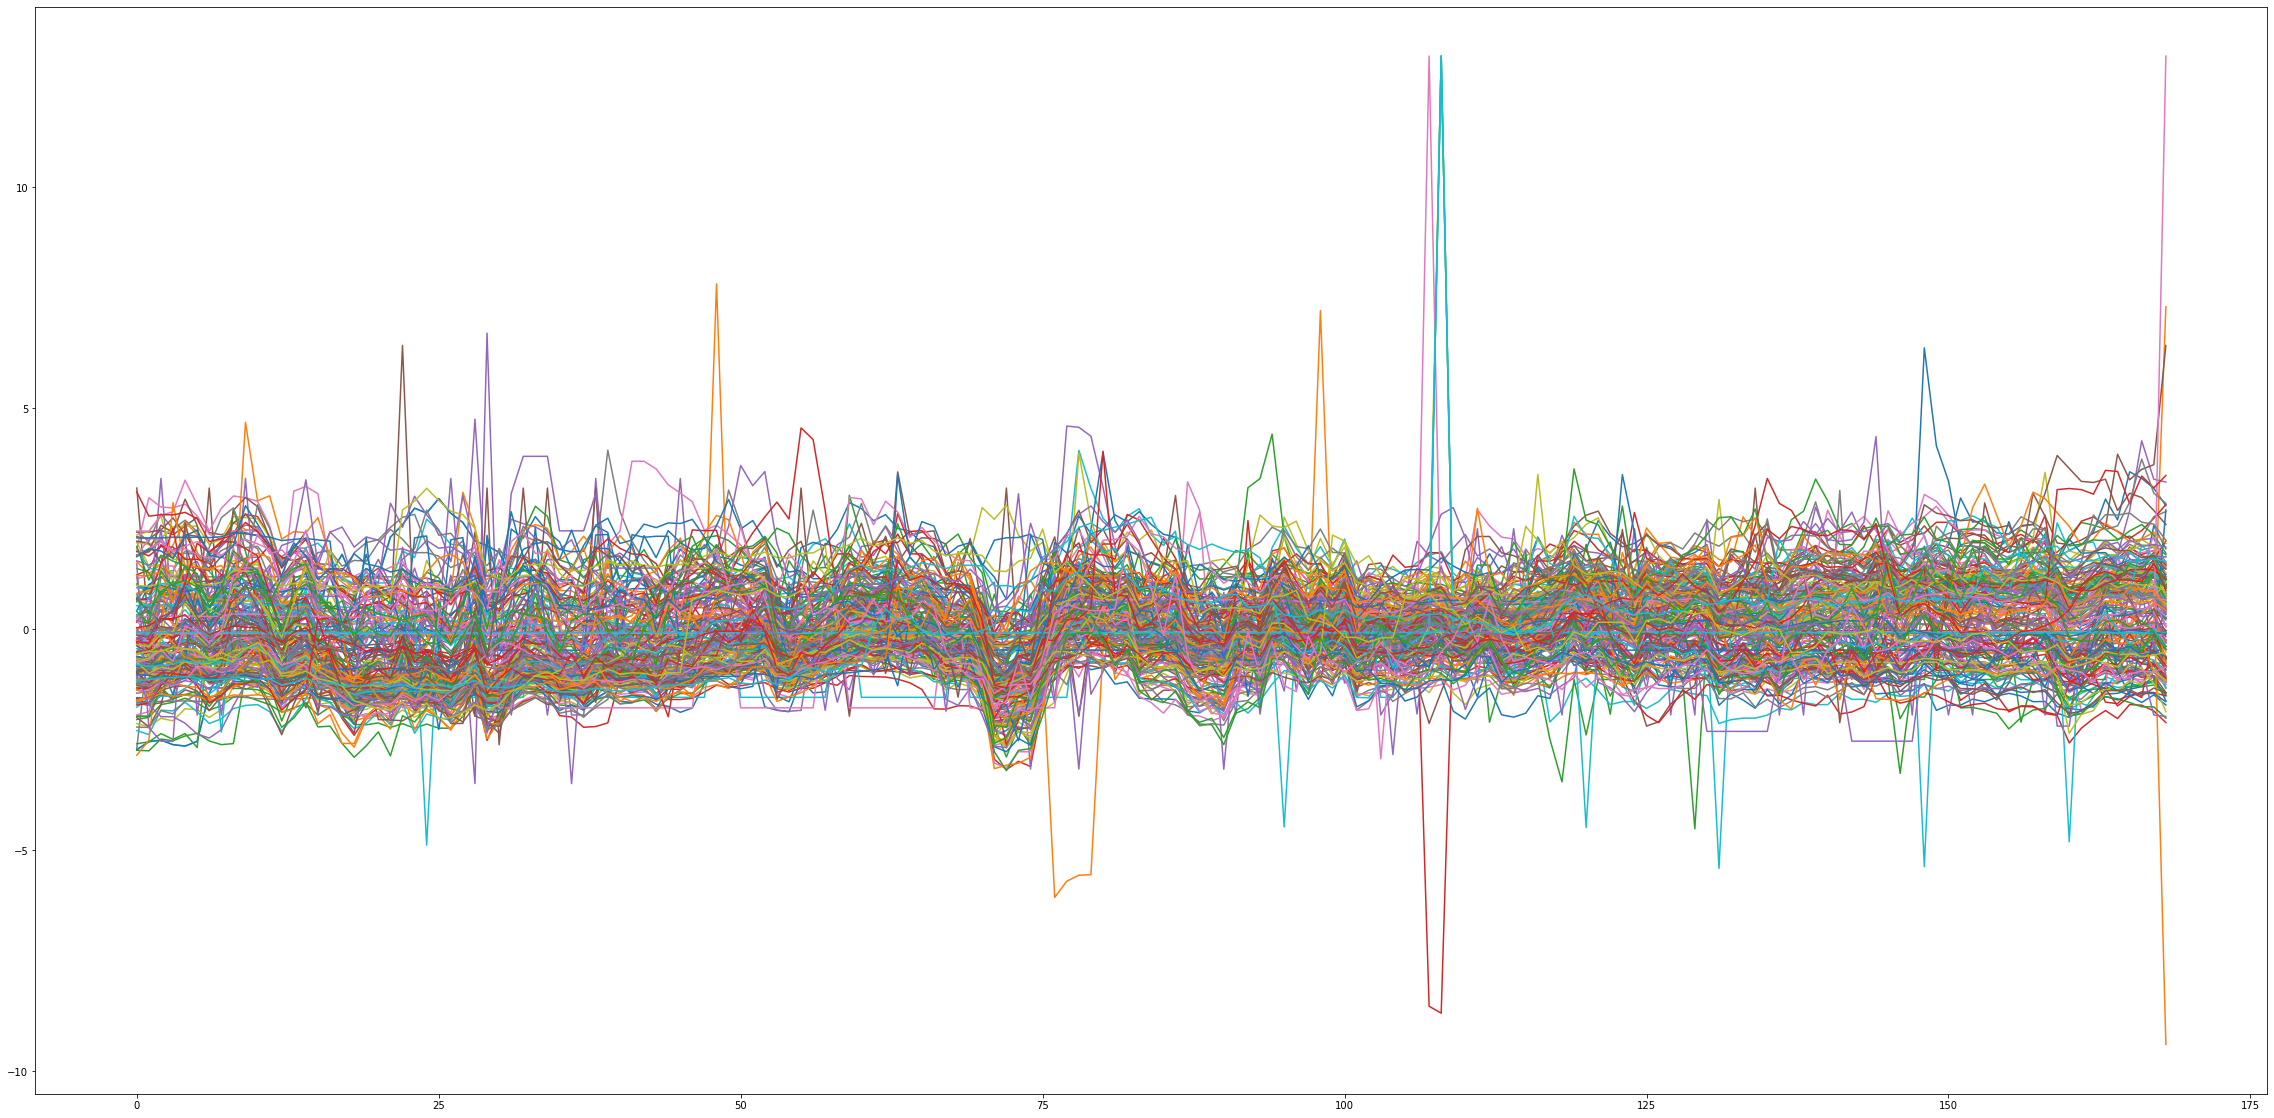

In [6]:
#standardizing our data for the correct operation of algorithms
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(hour_df.iloc[:, 1:].T).T

#plotting our scaled data
plt.figure(figsize=(40, 20))
plt.plot(tickers_scaled.T)

# Basic KMeans

  0%|          | 0/8 [00:00<?, ?it/s]

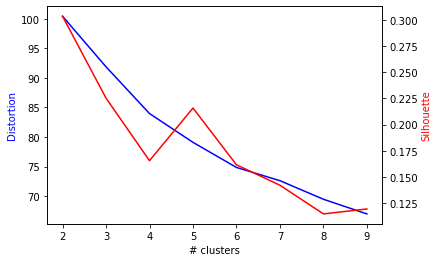

In [7]:
#calculate and draw distortions (elbow rule) and silhouette score (the bigger - the better)

distortions = []
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_, metric="euclidean"))

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

In [8]:
n_clusters = 5 #this number is relevant on October 10, 2020
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=6, max_iter=10)
ts_kmeans.fit(tickers_scaled)

TimeSeriesKMeans(max_iter=10, n_clusters=5, n_jobs=6)

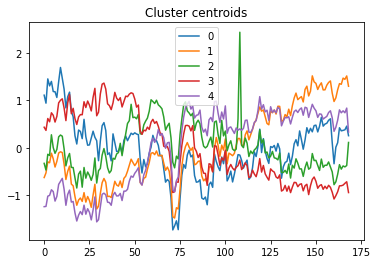

In [9]:
#plotting cluster centroids
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [10]:
#adding cluster column in our table (it will show the predicted cluster for each crypto)
hour_df['cluster'] = ts_kmeans.predict(tickers_scaled)

In [11]:
#drawing graphs of each crypto 
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(15, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.ticker}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                          Cluster number: 0


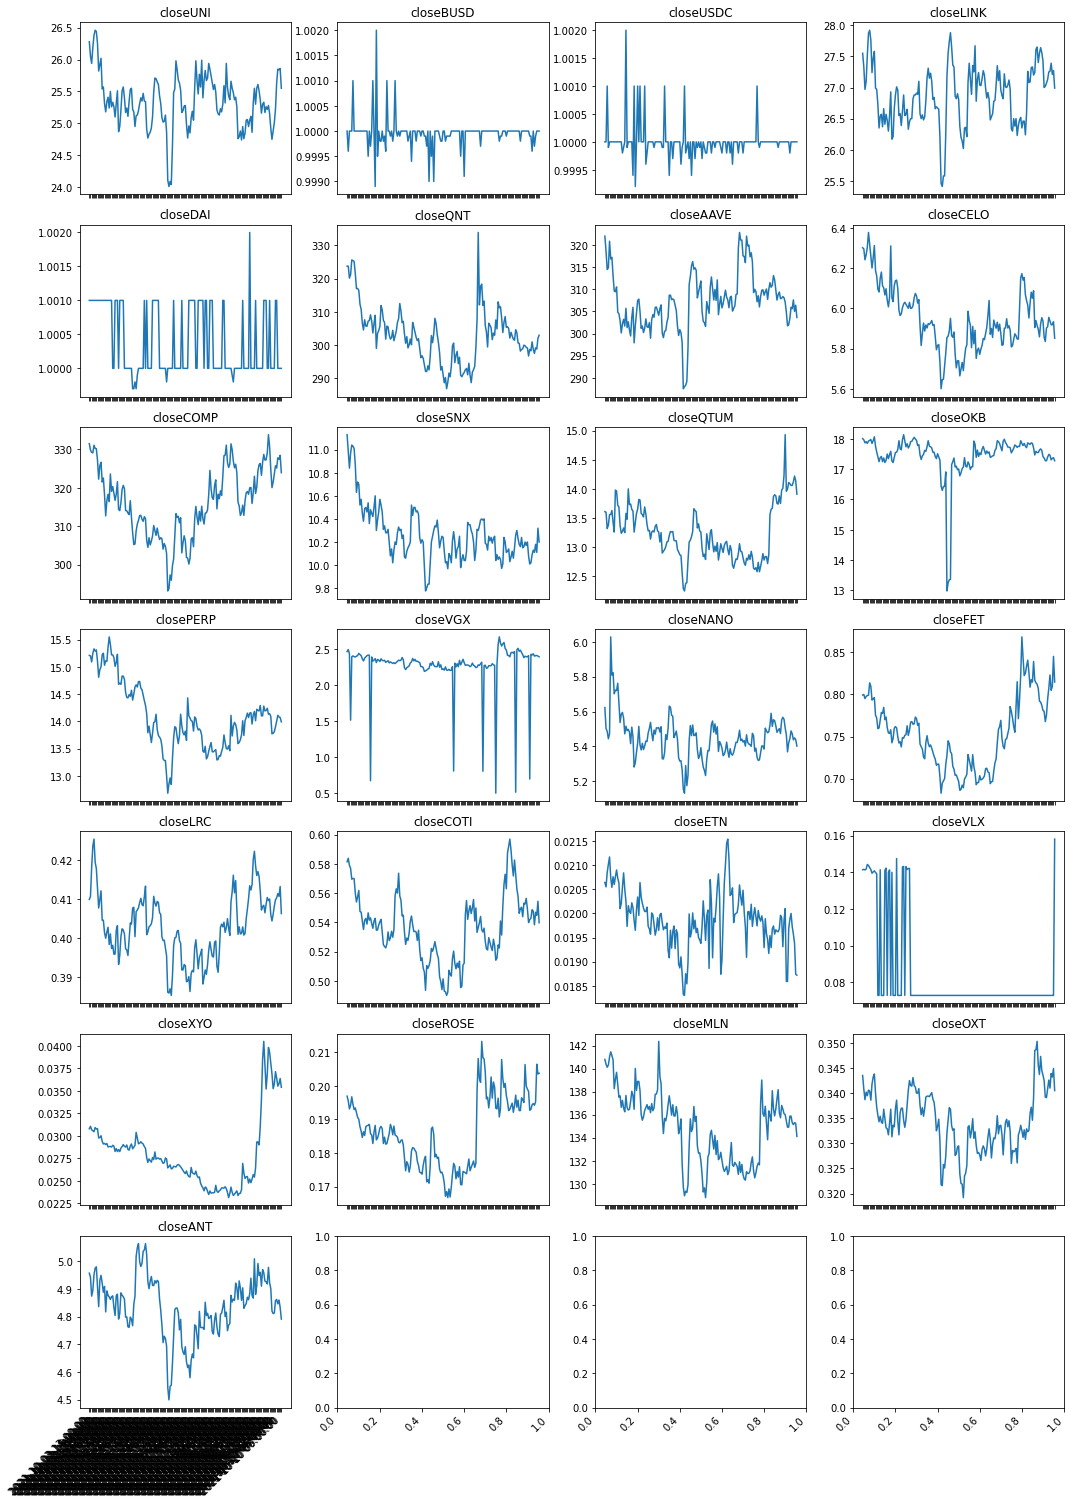

                          Cluster number: 1


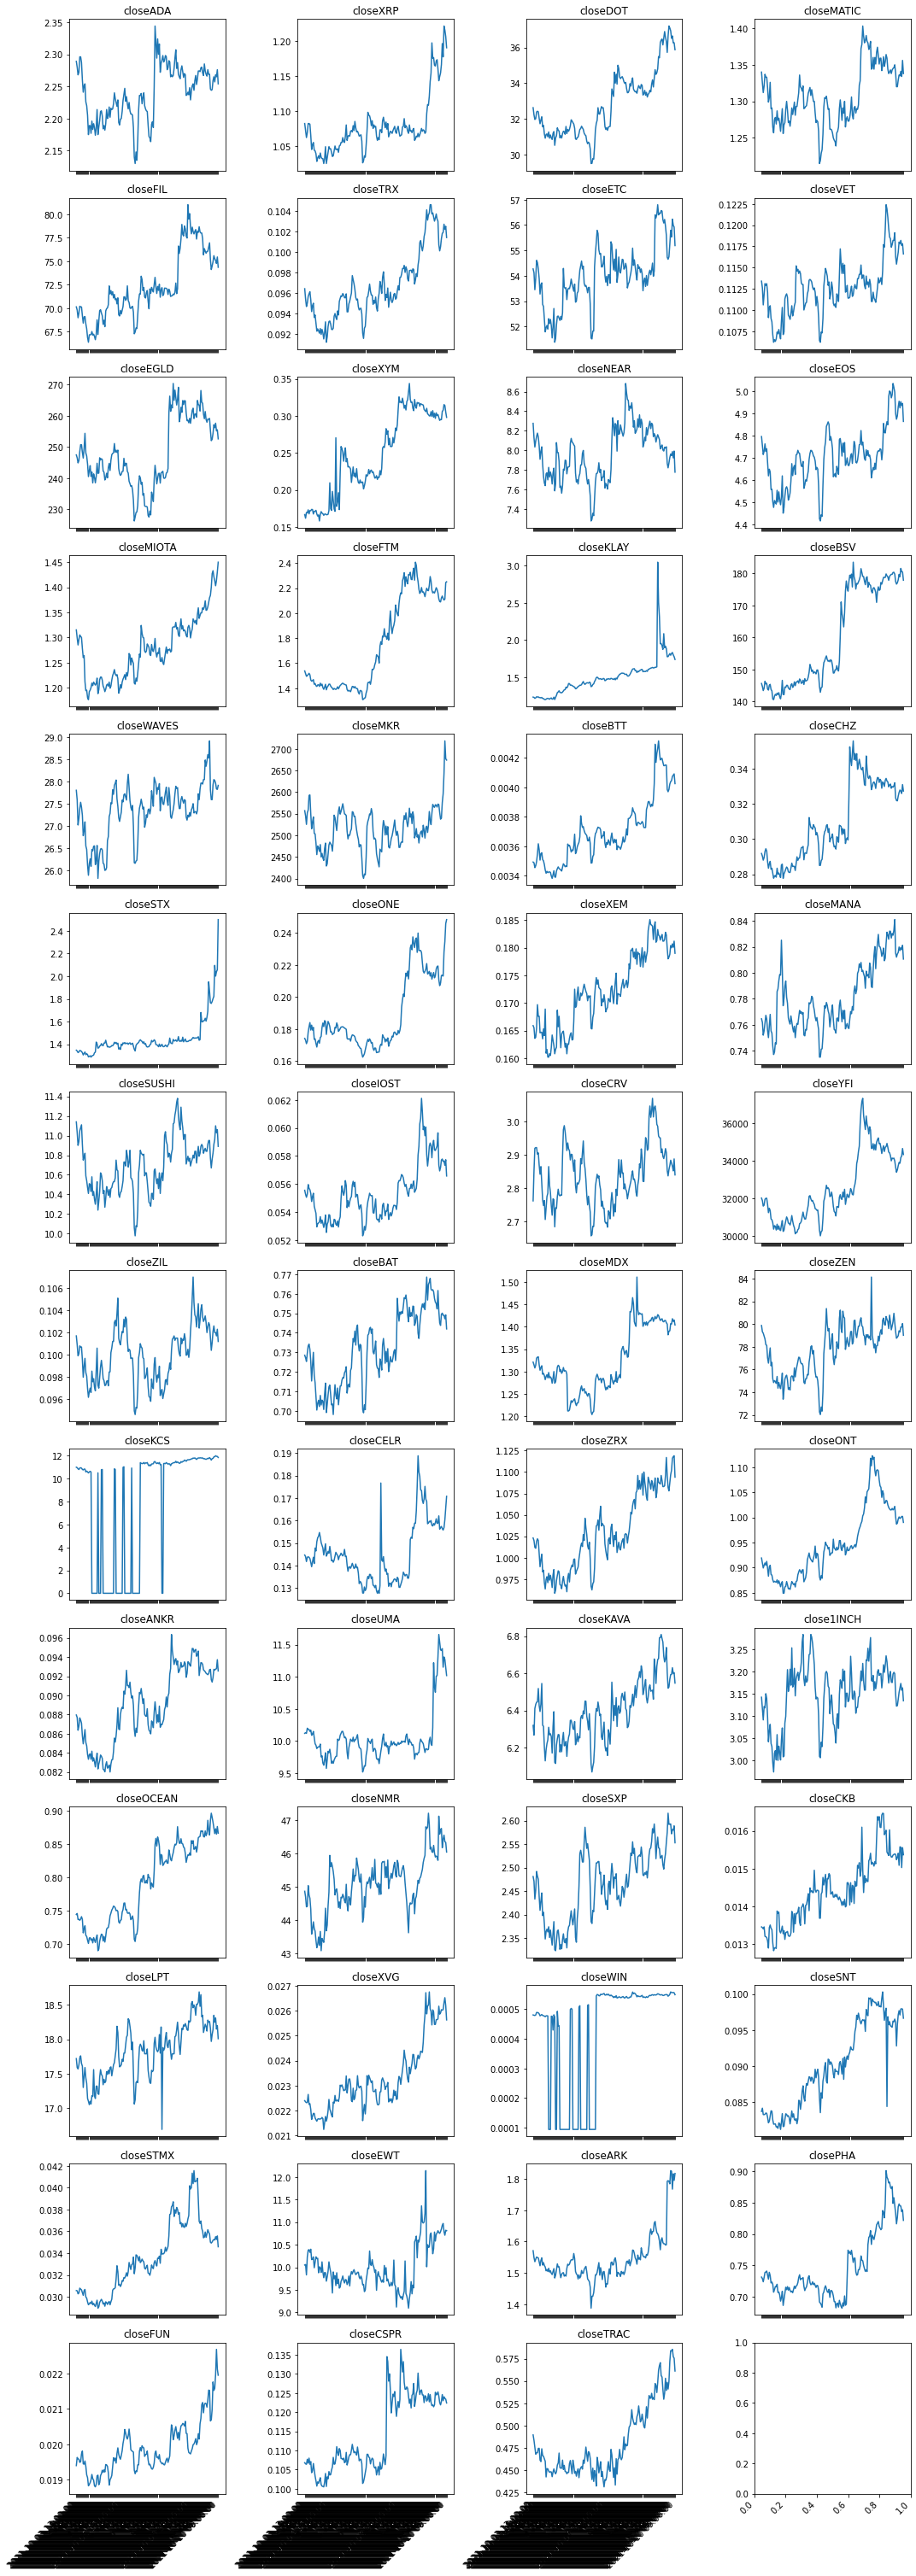

                          Cluster number: 2


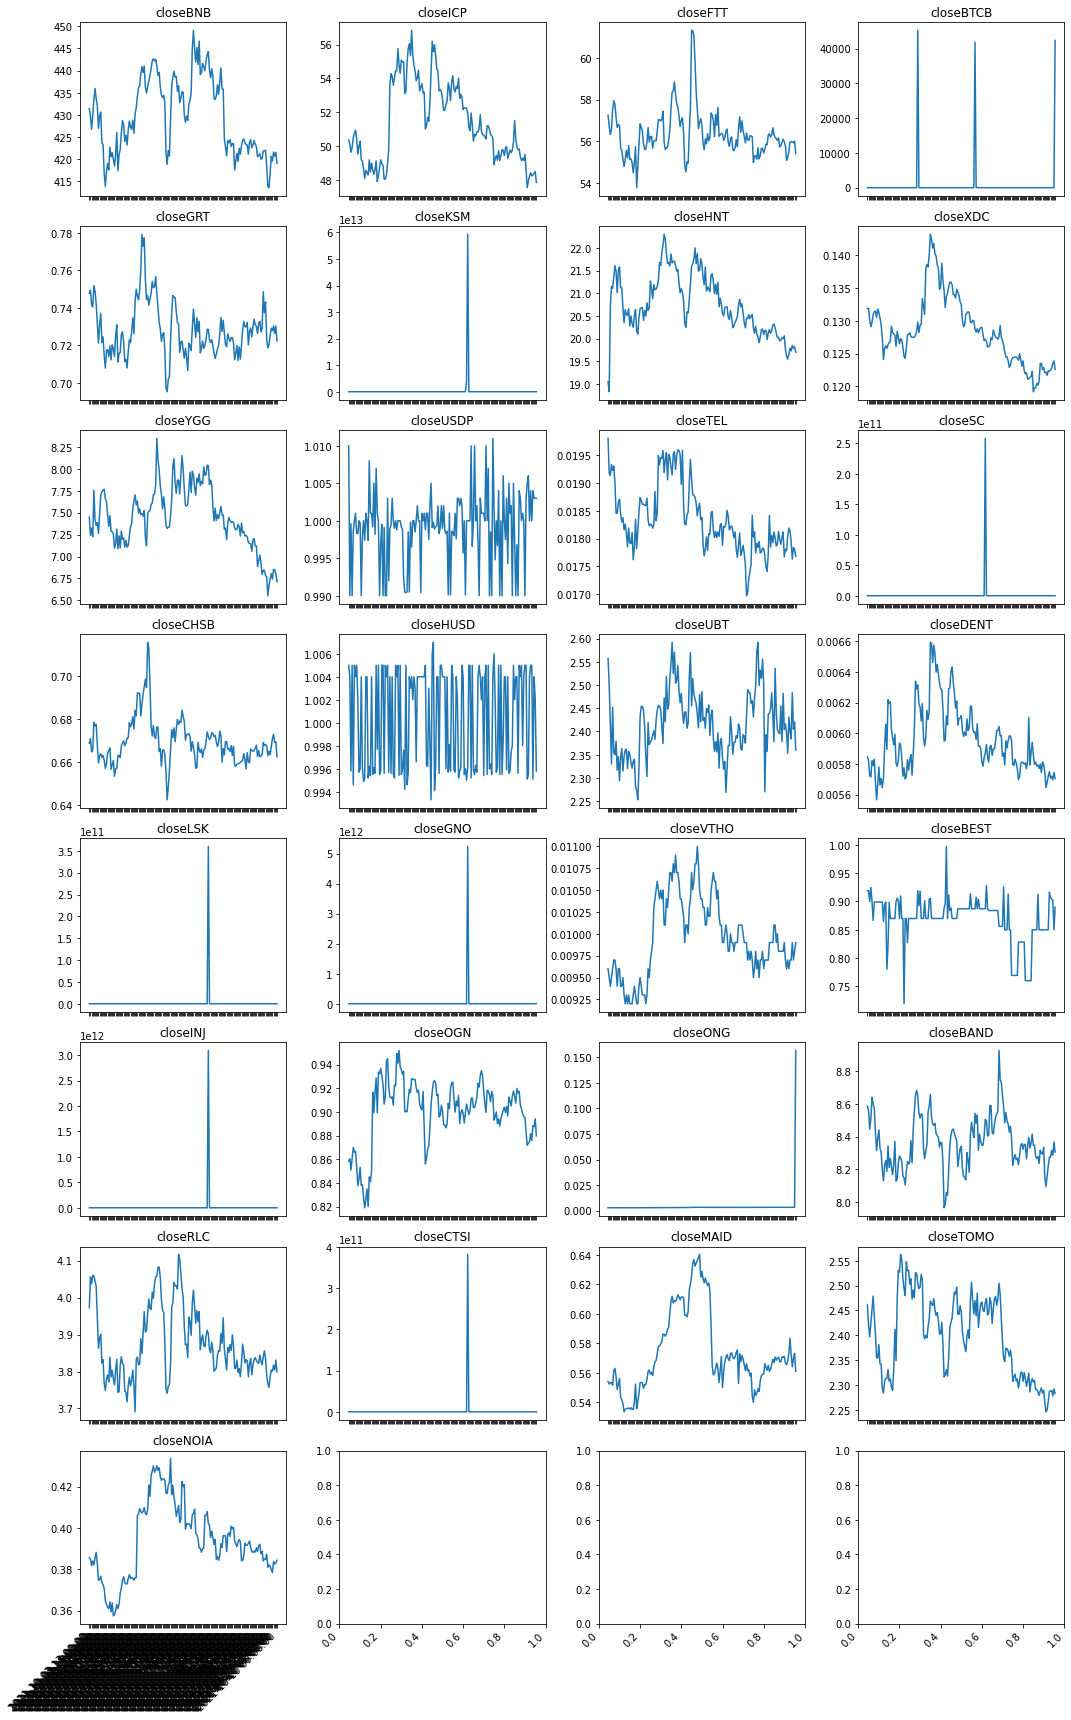

                          Cluster number: 3


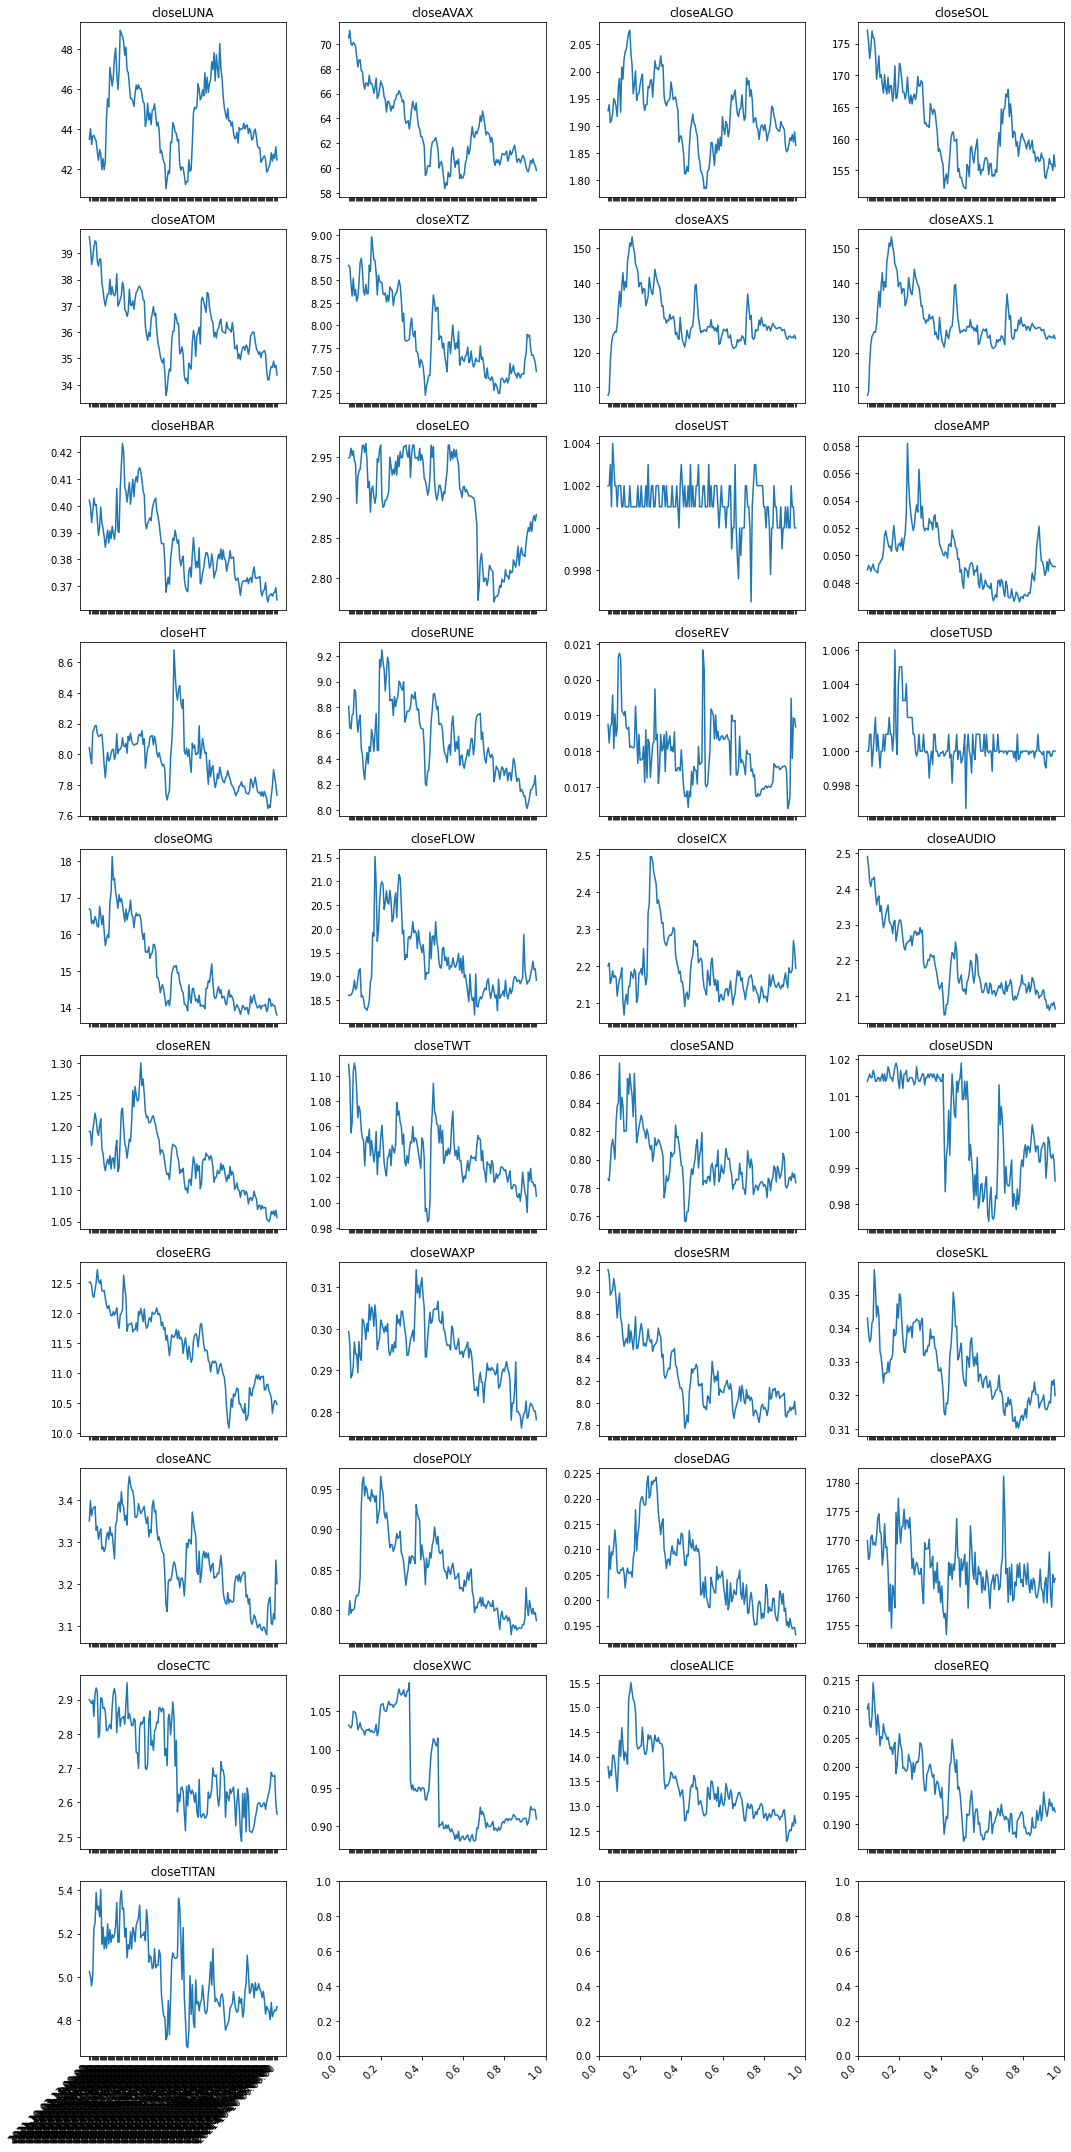

                          Cluster number: 4


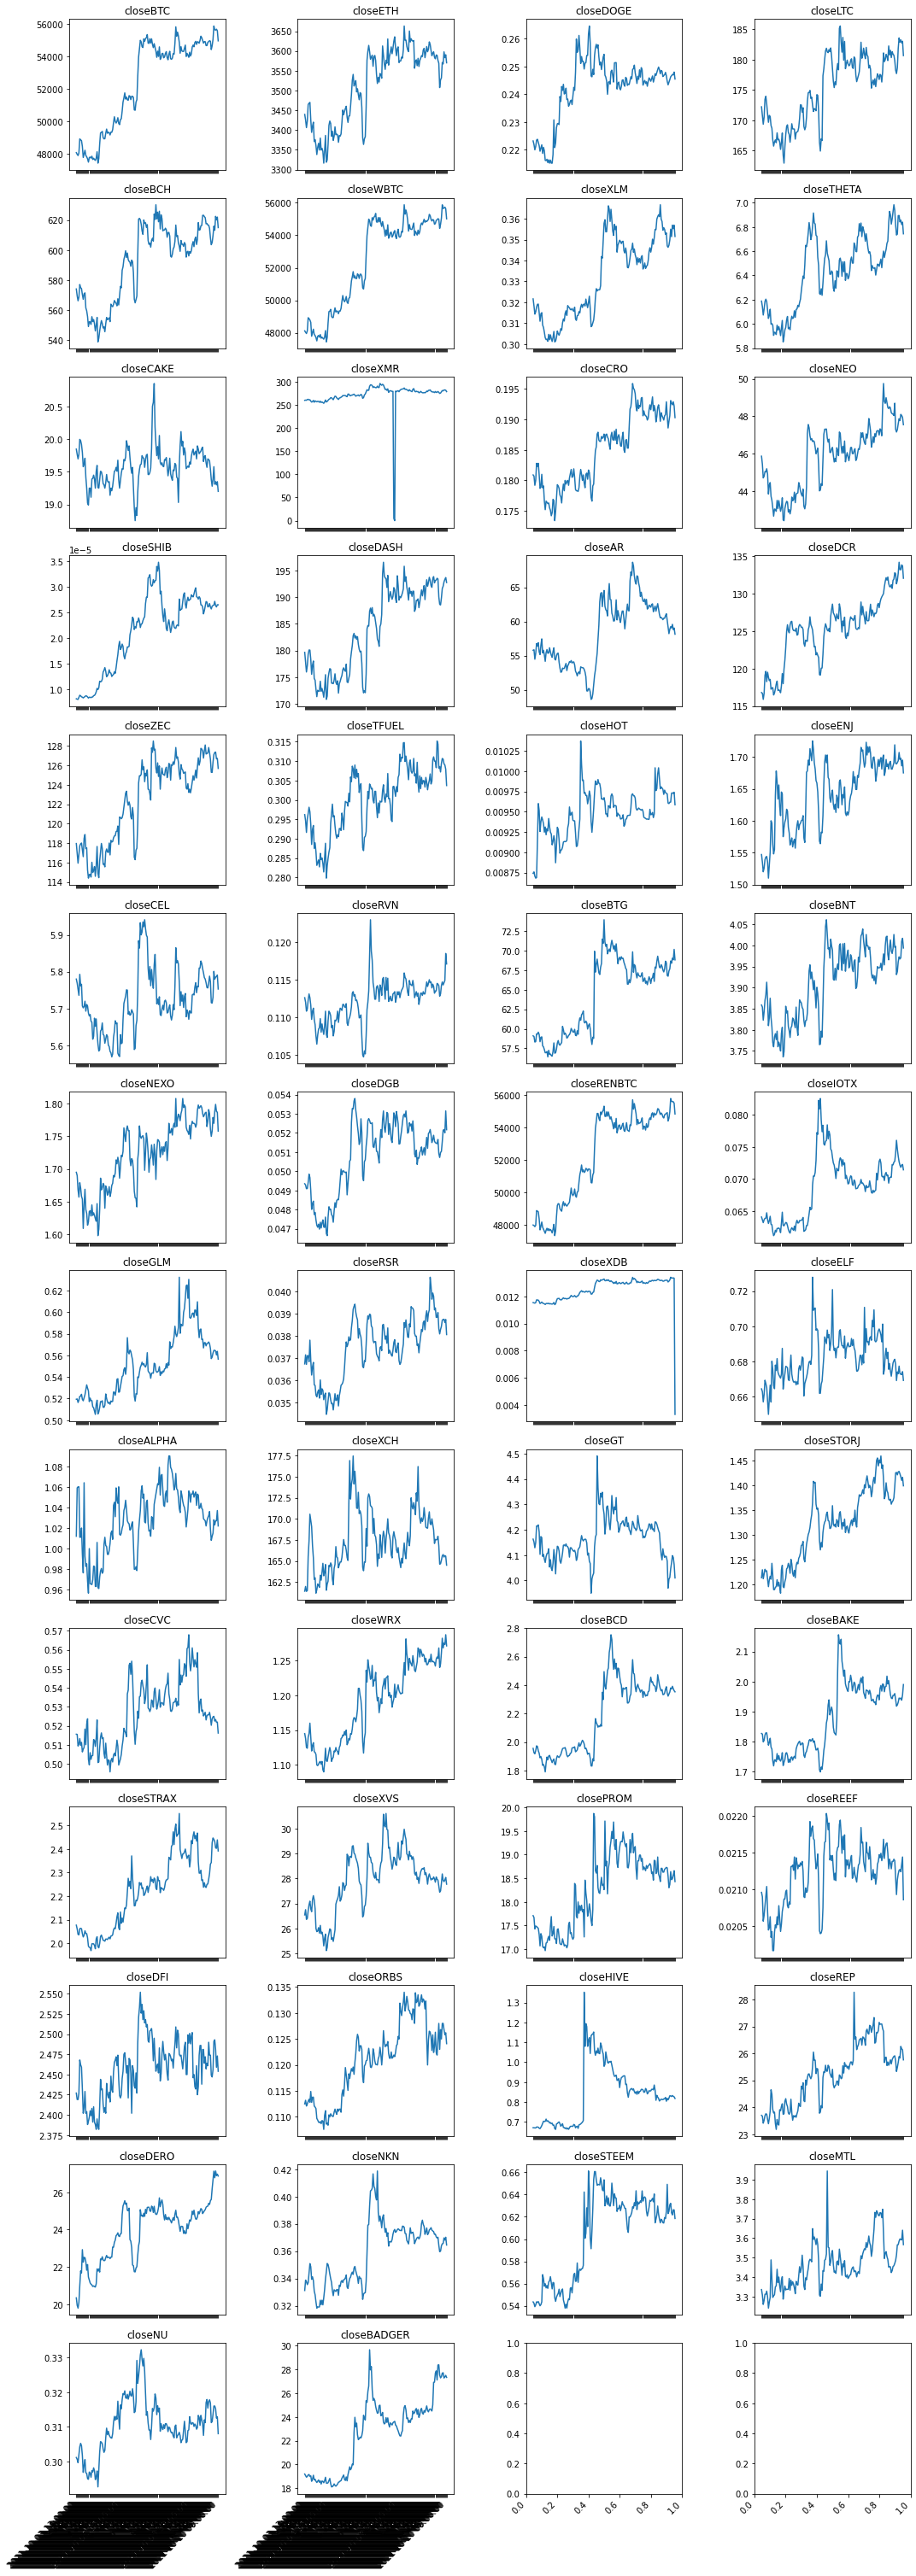

In [12]:
#crypto graphs grouped by clusters
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(hour_df[hour_df.cluster==cluster])

In [13]:
# writing results into csv_file
conclusion_kmeans = pd.DataFrame(hour_df.groupby('cluster')['ticker'].value_counts())
conclusion_kmeans.to_csv('hour_conclusion_kmeans.csv')

# DTW (Dynamic Time Warping)

  0%|          | 0/8 [00:00<?, ?it/s]

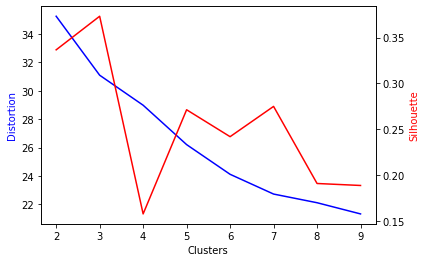

In [14]:
#nearly the same procedure as before (except metric)

distortions = []
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_, metric="dtw"))

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('Сlusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

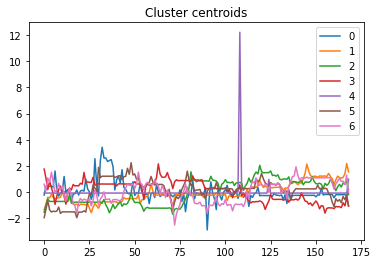

In [18]:
n_clusters = 7 #this number is relevant on October 10, 2020
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10)
ts_kmeans_dtw.fit(tickers_scaled)

for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans_dtw.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [19]:
hour_df['cluster'] = ts_kmeans_dtw.predict(tickers_scaled)

                          Cluster number: 0


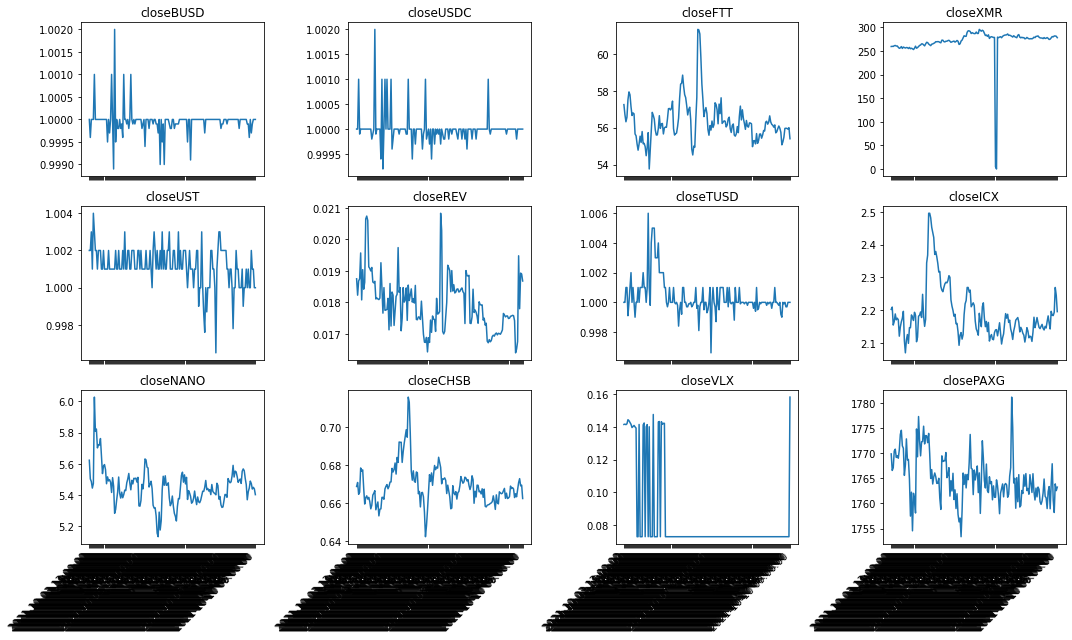

                          Cluster number: 1


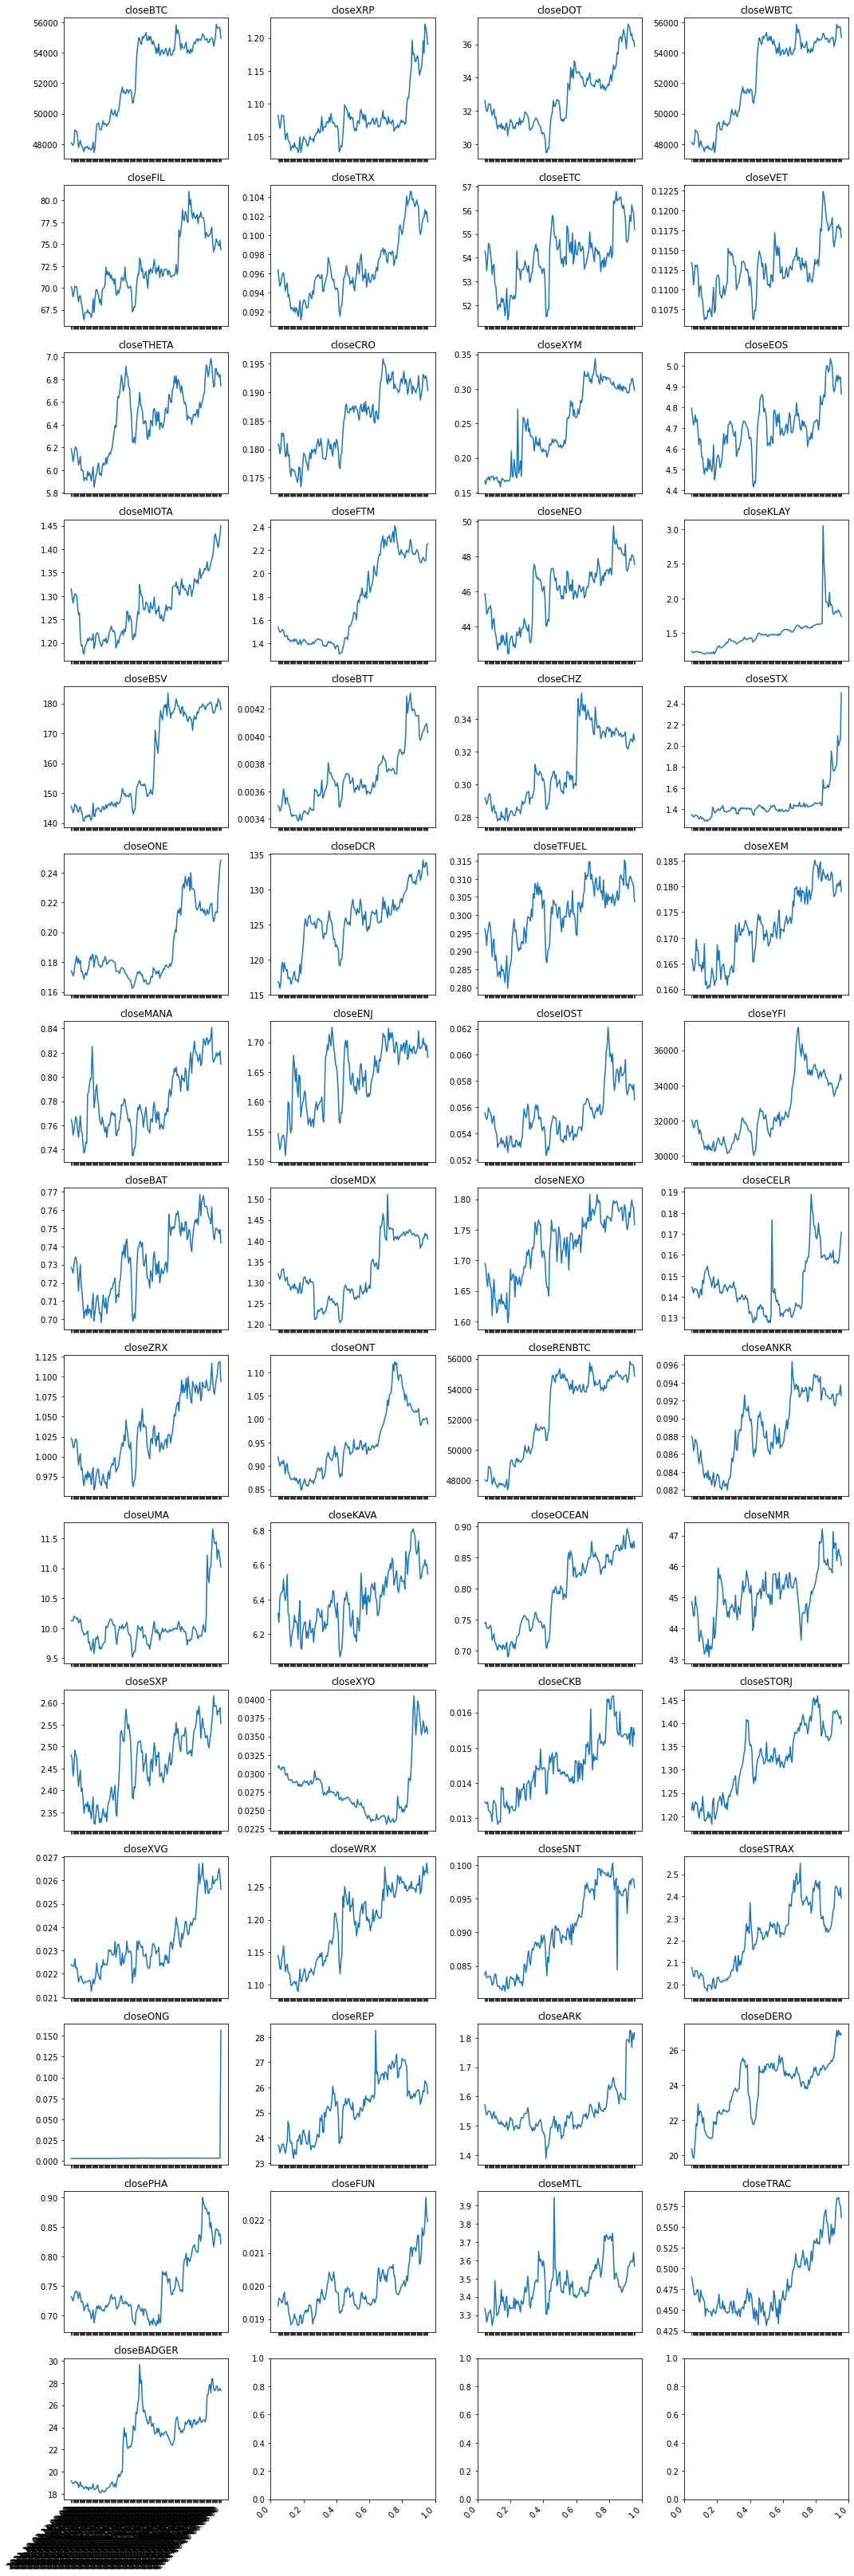

                          Cluster number: 2


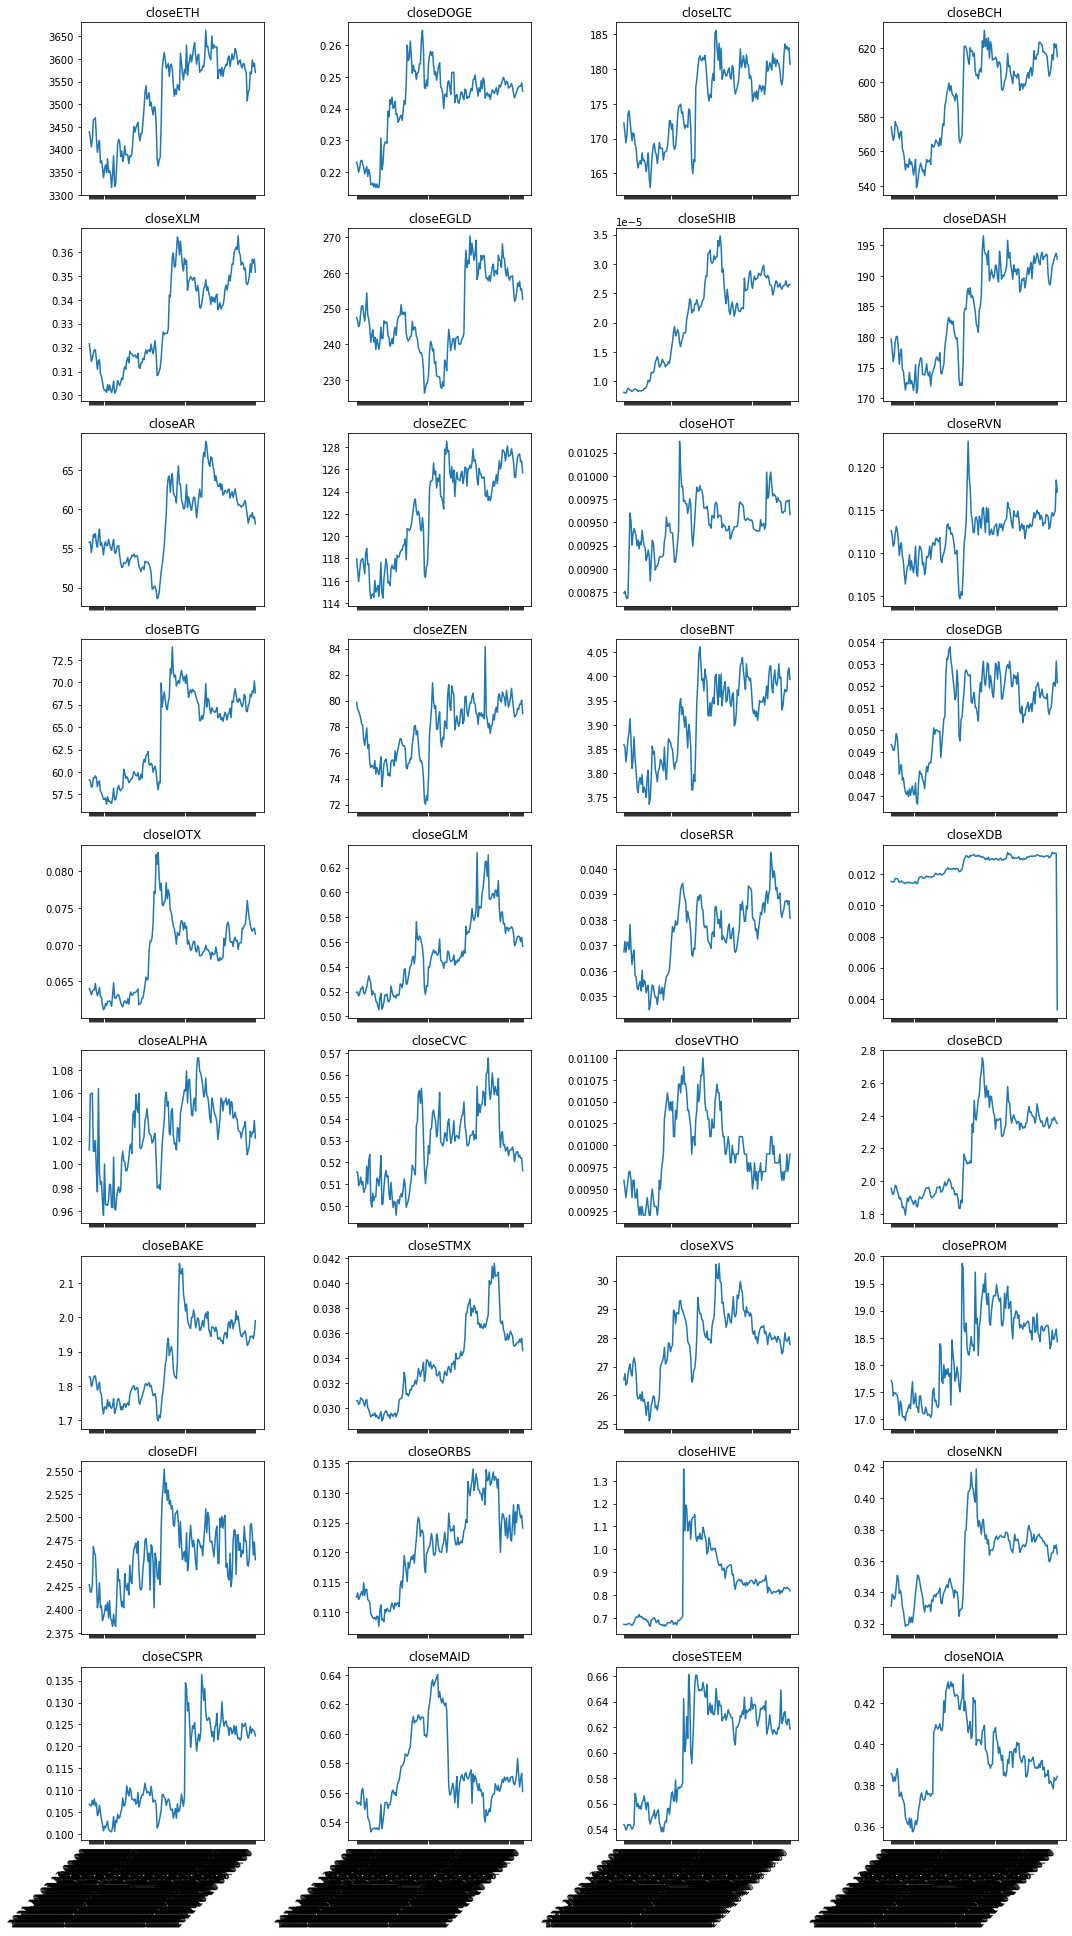

                          Cluster number: 3


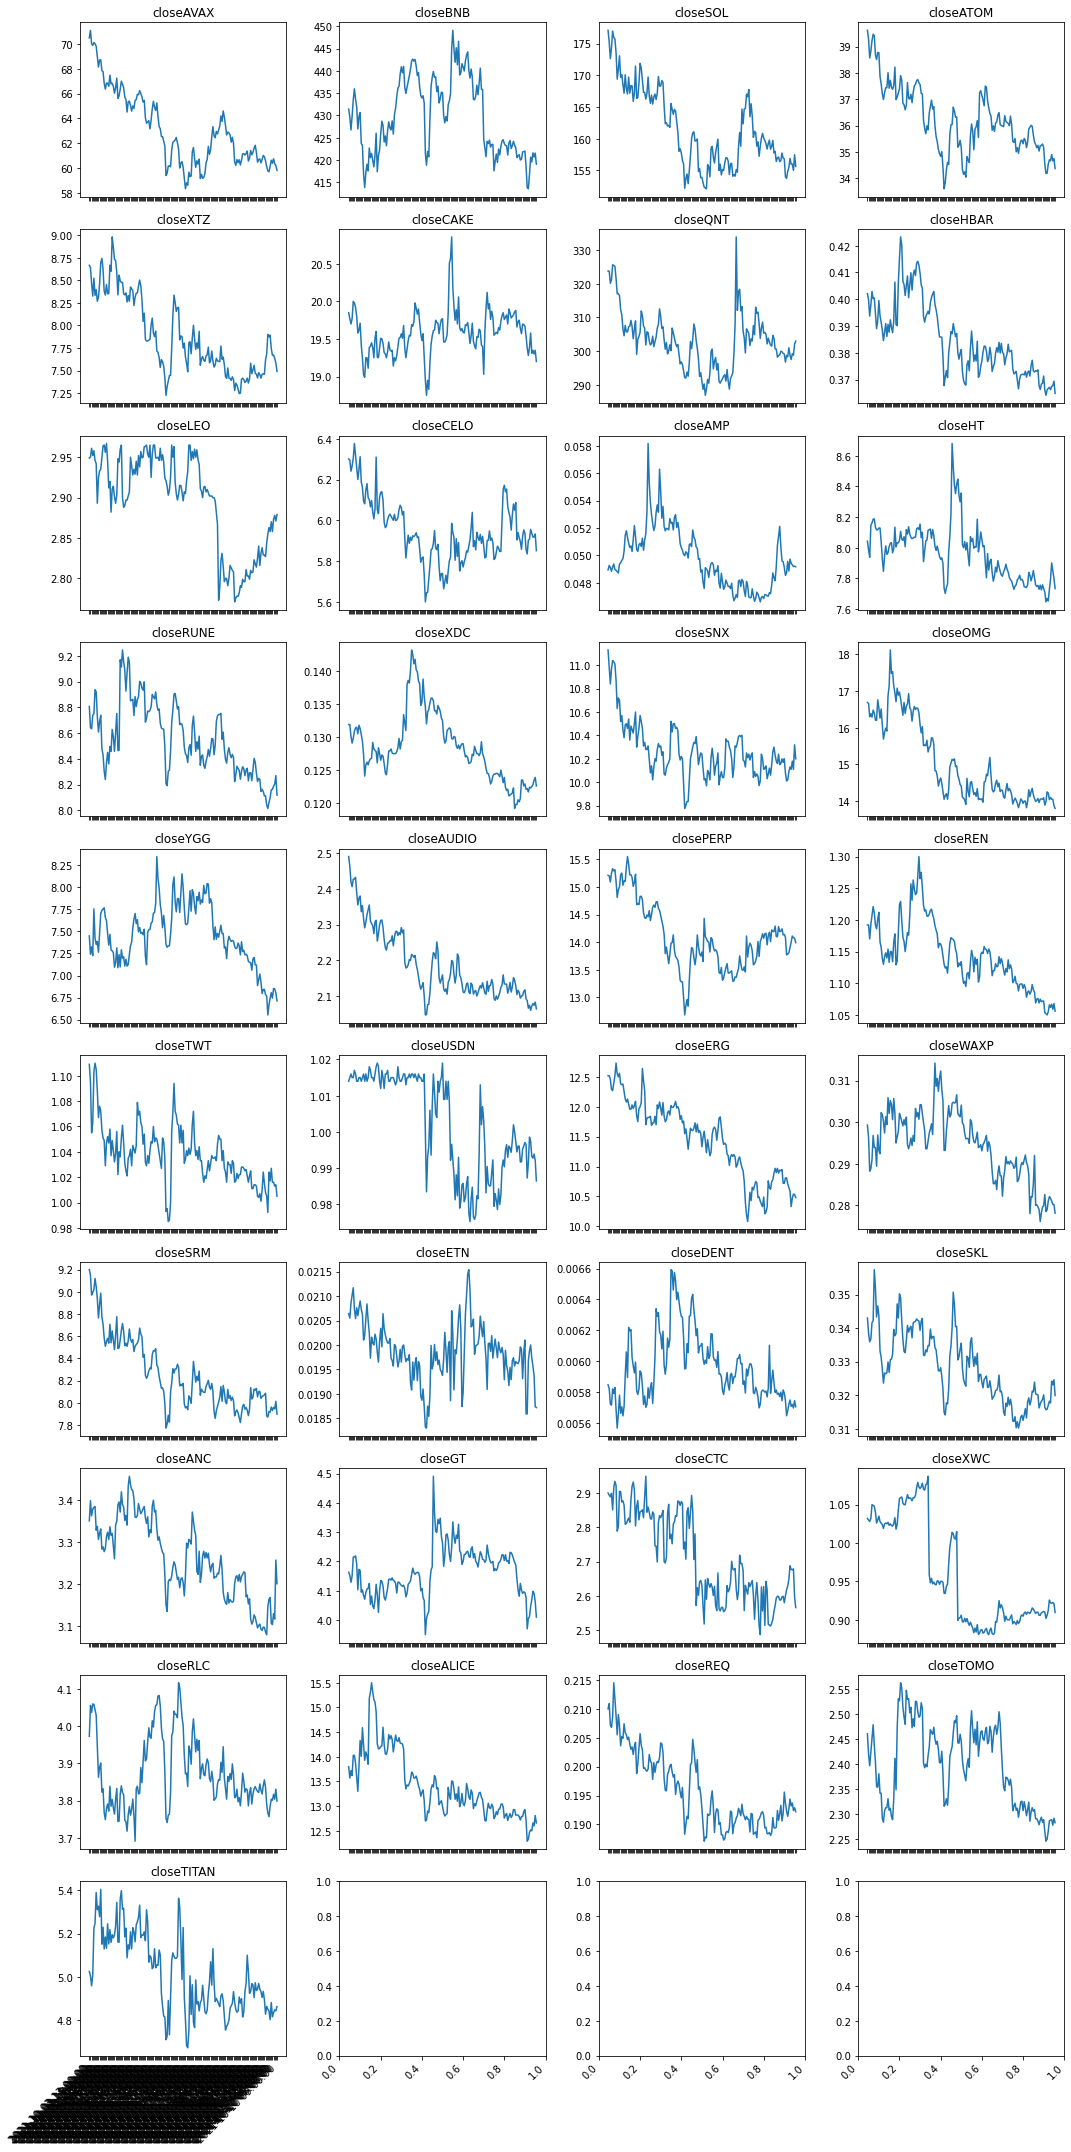

                          Cluster number: 4


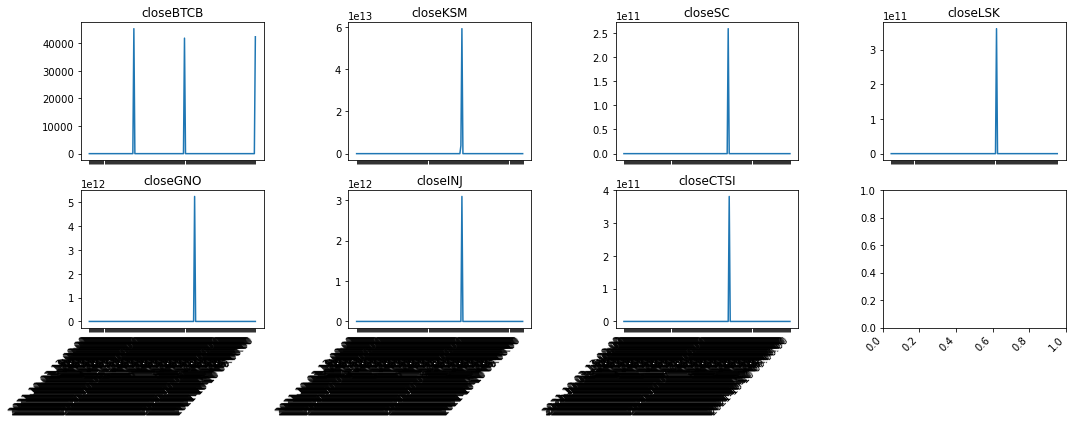

                          Cluster number: 5


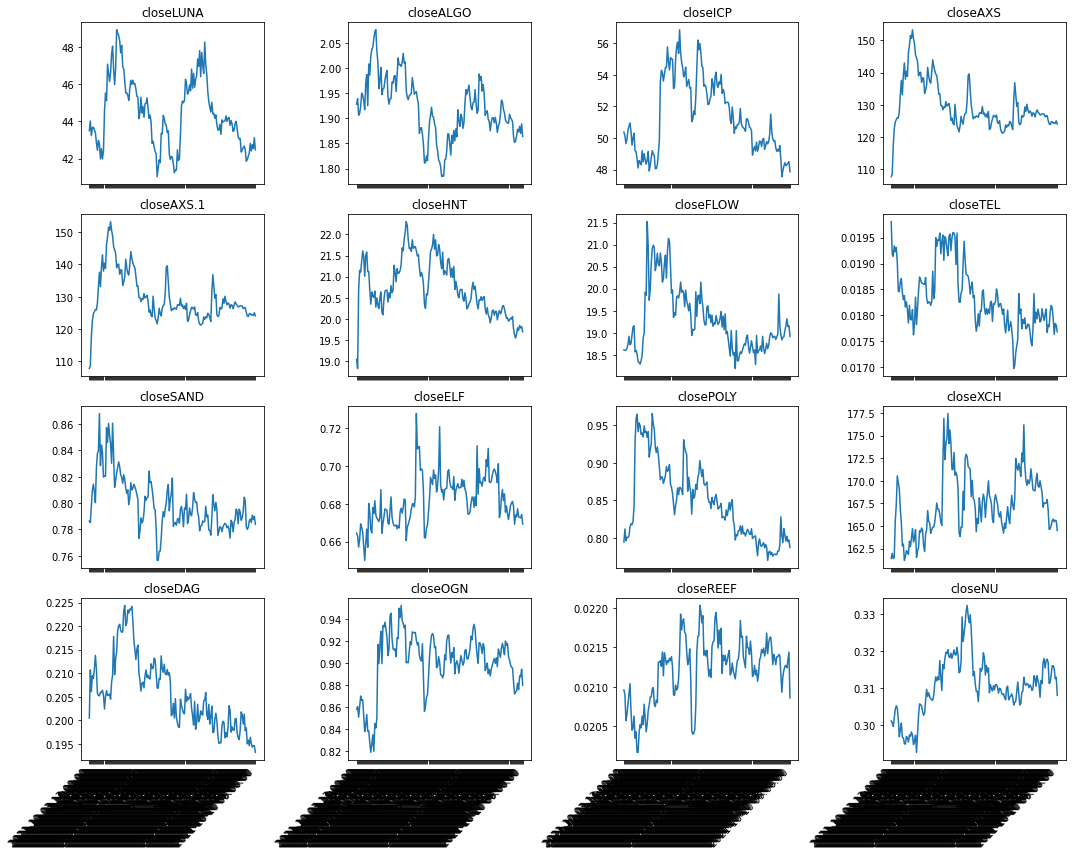

                          Cluster number: 6


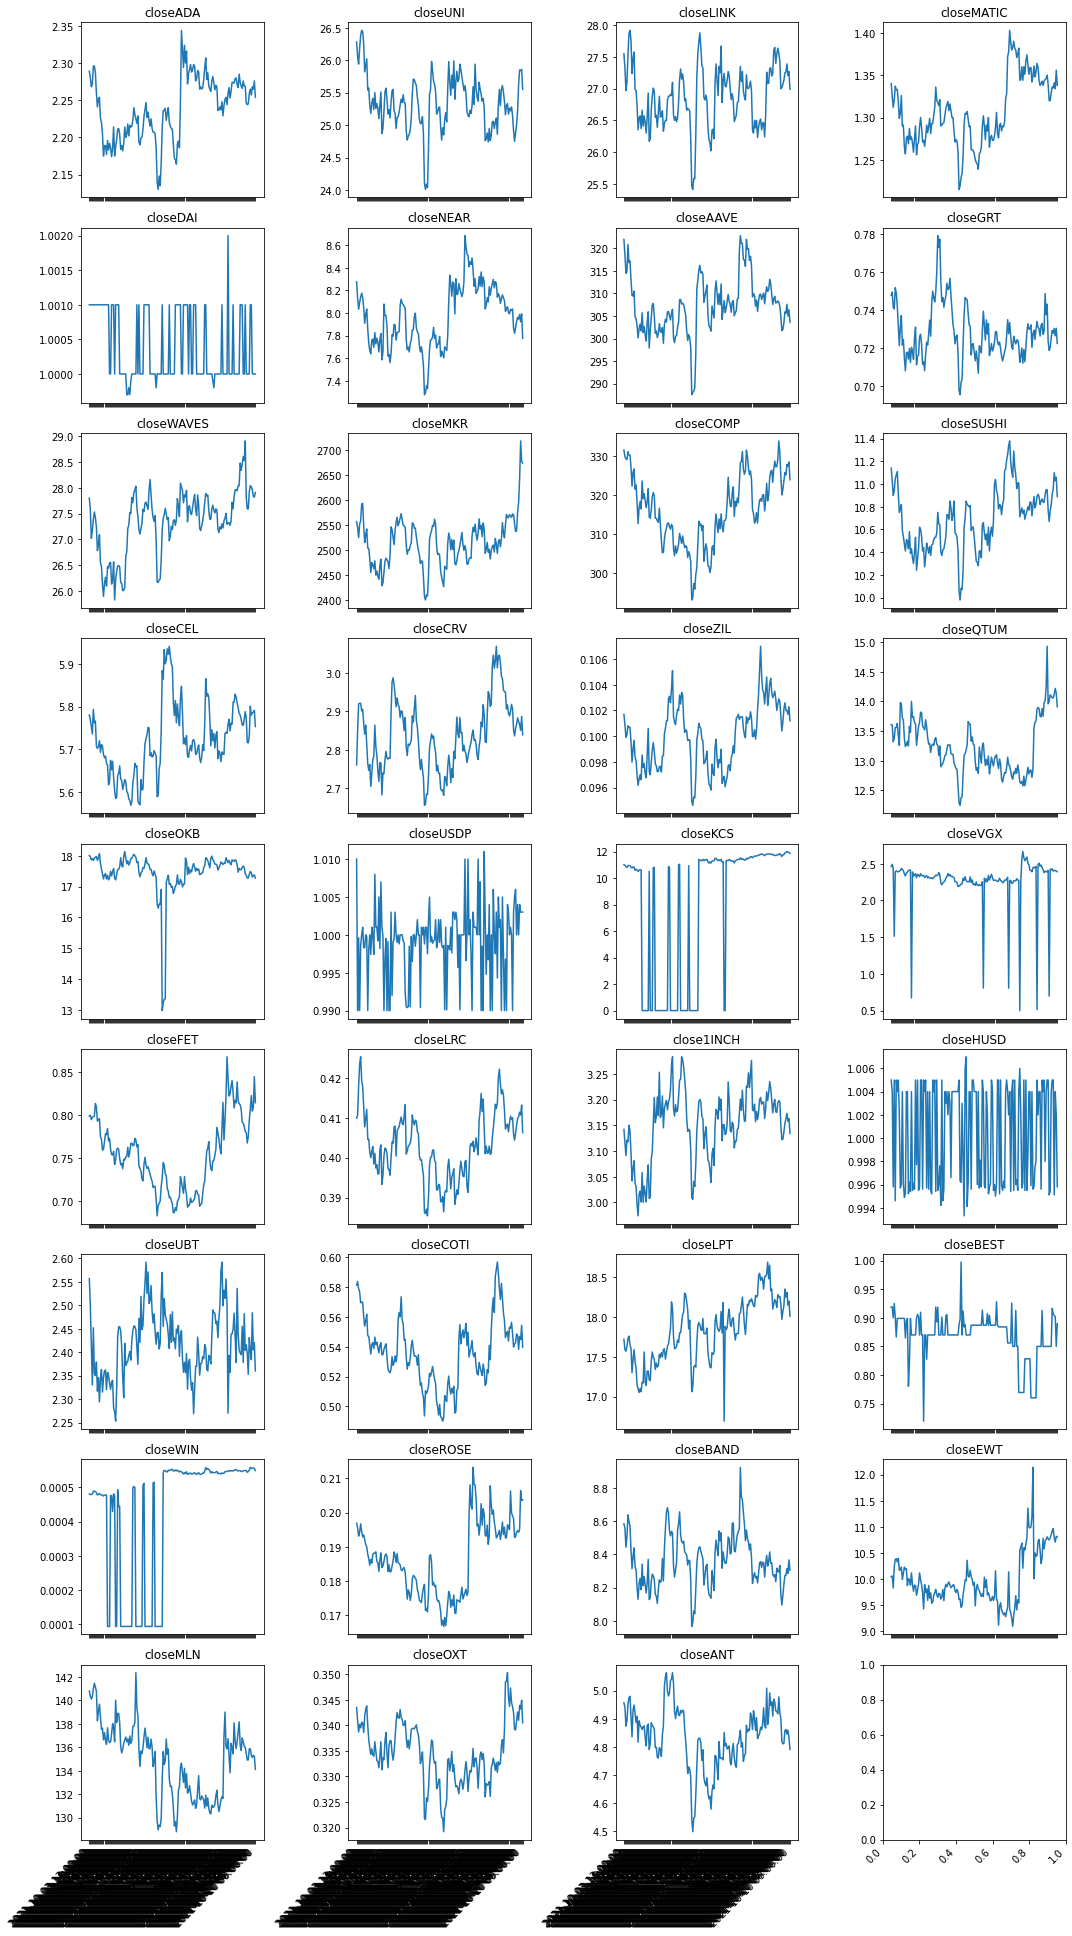

In [20]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(hour_df[hour_df.cluster==cluster])

In [21]:
# writing results into csv_file
conclusion_dtw = pd.DataFrame(hour_df.groupby('cluster')['ticker'].value_counts())
conclusion_dtw.to_csv('hour_conclusion_dtw.csv')